# CHAPTER 10-11

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
#import scipy.stats as ttest_1samp

In [2]:
data = pd.read_csv('books.csv', delimiter = ',')

In [3]:
#rename just for convenience
data.rename({'average_rating' : 'avr_rate',
             '# num_pages' : 'num_pages',
             'ratings_count' : 'ratings',
             'language_code' : 'language',
             'text_reviews_count' : 'text_reviews'}, axis = 'columns', inplace = 'True')

In [94]:
#rename just for convenience
data_raw.rename({'average_rating' : 'avr_rate',
             '# num_pages' : 'num_pages',
             'ratings_count' : 'ratings',
             'language_code' : 'language',
             'text_reviews_count' : 'text_reviews'}, axis = 'columns', inplace = 'True')

In [4]:
data.head()

,bookID,title,authors,avr_rate,isbn,isbn13,language,num_pages,ratings,text_reviews
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613.0
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390.0
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272.0
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964.0


In [5]:
summary = sum(data['num_pages'])
total = len(data['num_pages'])
for i in range(total):
    if (data['num_pages'][i] == 0):
        data['num_pages'][i] = summary/total

D:\3 course\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [6]:
data = data.drop([10666])

In [7]:
data.sample(7)

,bookID,title,authors,avr_rate,isbn,isbn13,language,num_pages,ratings,text_reviews
10875,35722,Mad Cowboy: Plain Truth from the Cattle Ranche...,Howard F. Lyman-Glen Merzer,4.13,0684854465,9780684854465,en-US,224,1804,165.0
9994,32276,Dragons of Eden: Speculations on the Evolution...,Carl Sagan,4.17,0345346297,9780345346292,eng,271,14974,452.0
11004,36334,Doomed Queen Anne (Young Royals #3),Carolyn Meyer,3.87,0152050868,9780152050863,en-GB,240,3478,190.0
4004,12203,Frost,Thomas Bernhard-Michael Hofmann,3.88,1400040663,9781400040667,eng,342,690,63.0
11246,37574,The Mirror Crack'd,Agatha Christie,3.91,0553350153,9780553350159,eng,212,62,10.0
1379,4042,Godless: The Church of Liberalism,Ann Coulter,3.31,1400054206,9781400054206,eng,310,2681,350.0
10829,35454,The Dharma of Star Wars,Matthew Bortolin,4.03,0861714970,9780861714971,eng,224,343,35.0


In [8]:
data.describe()

,bookID,avr_rate,num_pages,ratings,text_reviews
count,13718.000000,13718.000000,13718.000000,1.371800e+04,13718.000000
mean,22159.651407,3.930551,344.521213,1.776039e+04,533.478787
std,13699.671611,0.357875,251.164675,1.129411e+05,2528.653867
min,1.000000,0.000000,1.000000,0.000000e+00,0.000000
25%,10620.500000,3.770000,199.000000,8.300000e+01,7.000000
50%,21321.500000,3.960000,304.000000,6.300000e+02,40.000000
75%,33311.750000,4.130000,421.000000,4.738500e+03,222.000000
max,47709.000000,5.000000,6576.000000,5.629932e+06,93619.000000


In [9]:
data.columns

Index(['bookID', 'title', 'authors', 'avr_rate', 'isbn', 'isbn13', 'language',
       'num_pages', 'ratings', 'text_reviews'],
      dtype='object')

In [10]:
%matplotlib inline

In [11]:
plt.rcParams['figure.figsize'] = (12.0, 9.0)

# Linear Regression using Least Squares

### Implementing data
##### Preprocessing Input data.

In [12]:
import seaborn as sns

In [13]:
sns.set_style("darkgrid")

In [14]:
X = data.text_reviews.values
Y = data.avr_rate.values

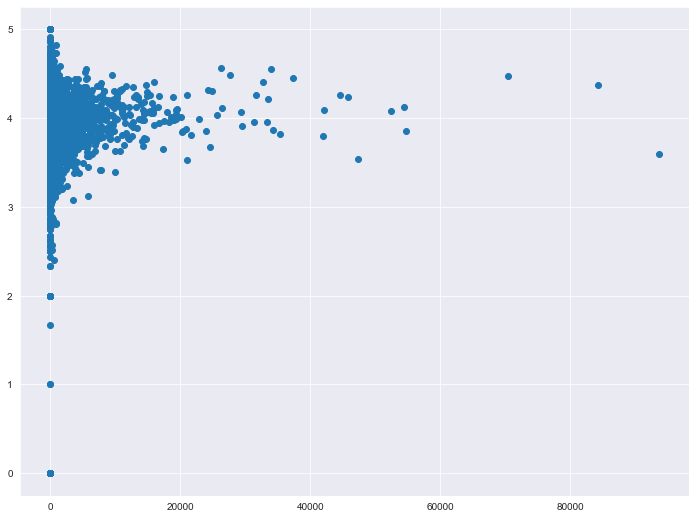

In [15]:
#X = data.iloc[:, 0]
#Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

A scatter plot of the two variables is created. Because we contrived the dataset, we know there is a relationship between the two variables. This is clear when we review the generated scatter plot where we can see an increasing trend.

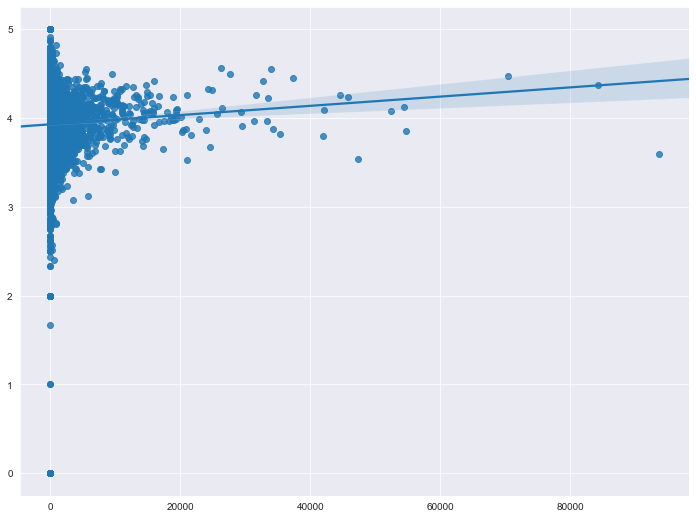

In [16]:
sns.regplot(X,Y)

df = data.drop(labels = ['title', 'authors', 'language'], axis = 1)

##### Building the model

In [17]:
print('Text reviews: mean=%.3f stdv=%.3f' % (np.mean(X), np.std(X)))
print('Average rating: mean=%.3f stdv=%.3f' % (np.mean(Y), np.std(Y)))

Text reviews: mean=533.479 stdv=2528.562
Average rating: mean=3.931 stdv=0.358


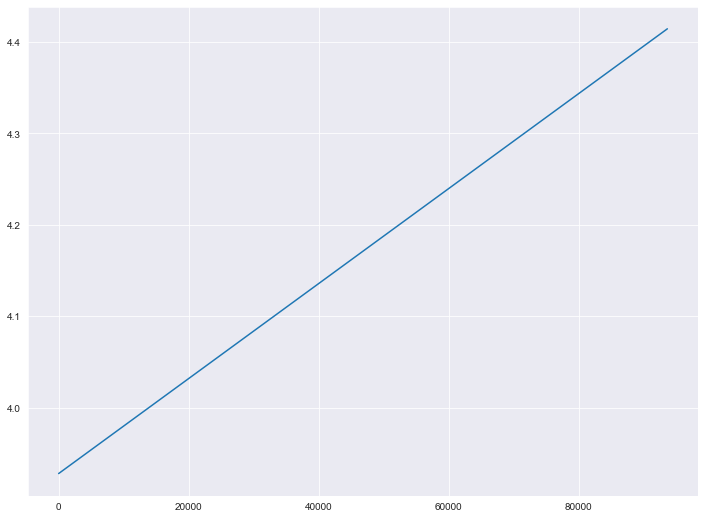

In [18]:
plt.plot(np.unique(X), np.poly1d(np.polyfit(X, Y, 1))(np.unique(X)))

### Estimate intercept and slope

In [19]:
from scipy.stats import linregress

slope : slope of the regression line

intercept : intercept of the regression line

r-value : correlation coefficient

p-value : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero

stderr : Standard error of the estimate

In [20]:
linregress(X, Y)

LinregressResult(slope=5.198572581404209e-06, intercept=3.927777772548715, rvalue=0.036731823953878966, pvalue=1.683234521631894e-05, stderr=1.2076322453891596e-06)

In [21]:
from scipy.stats import mstats

In [22]:
df1 = data[['avr_rate','text_reviews']]

In [23]:
df1.head()

,avr_rate,text_reviews
0,4.56,26249.0
1,4.49,27613.0
2,4.47,70390.0
3,4.41,272.0
4,4.55,33964.0


In [24]:
# Calculate the quantiles column wise
quantiles = mstats.mquantiles(df1, axis=0)

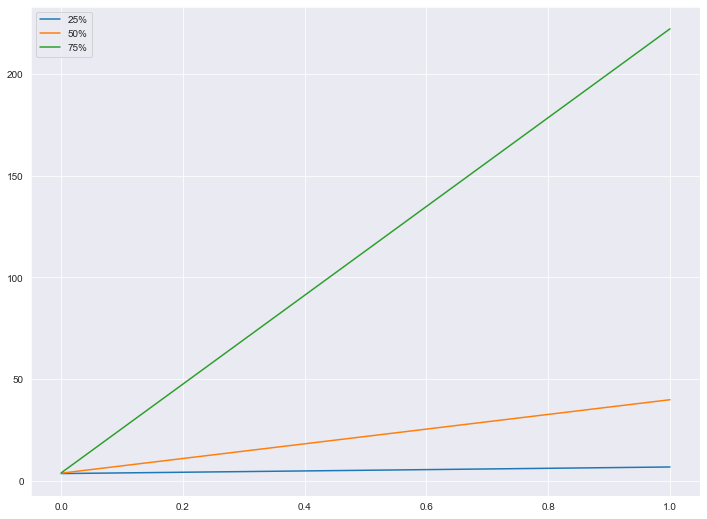

In [25]:
# Plot it
labels = ['25%', '50%', '75%']
for i, q in enumerate(quantiles):
    plt.plot(q, label=labels[i])
plt.legend()

### Plotting residuals of a regression

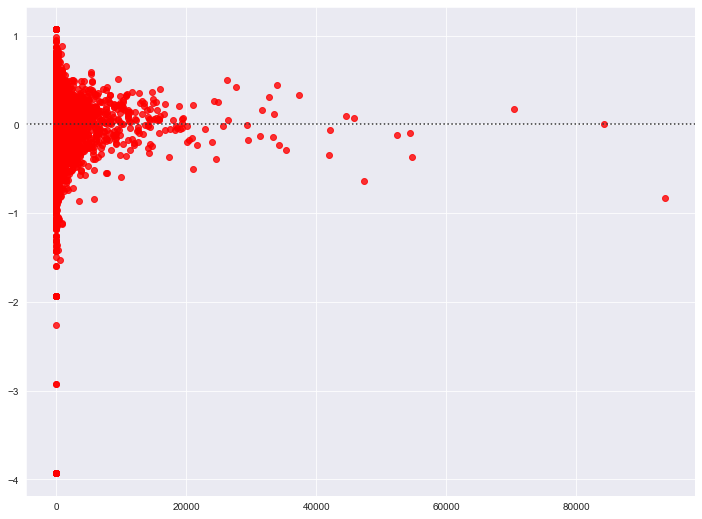

In [26]:
sns.residplot(X, Y, color = 'red')

### Covariance

In [27]:
covariance = np.cov(X, Y)
print(covariance)

[[6.39409038e+06 3.32401429e+01]
 [3.32401429e+01 1.28074304e-01]]


The covariance between the two variables is 3.324. We can see that it is negative, suggesting the variables change in the same direction. The Pearson’s correlation coefficient next

Compute correlation.

In [28]:
from scipy.stats import pearsonr

#### Pearson’s Correlation

In [29]:
corr, _ = pearsonr(X, Y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.037


We can see that the two variables are positively correlated and that the correlation is 0.037. This suggests a low level of correlation, a value above 0 and close to 0.5.

In [30]:
from scipy.stats import spearmanr

#### Spearman’s Correlation

In [31]:
corr, _ = spearmanr(X, Y)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.029


We know that the data is Gaussian and that the relationship between the variables is linear. Nevertheless, the nonparametric rank-based approach shows a really weak correlation between the variables of 0.03.

### Coefficient of determination

In [32]:
def r2_corrcoef(x, y):
    return np.corrcoef(x, y)[0, 1]**2

In [33]:
r2 = r2_corrcoef(X,Y)
print('Coefficient of dertermination R^2: ', r2)

Coefficient of dertermination R^2:  0.0013492268909787576


In [34]:
rho = np.corrcoef(X,Y)
print('Correlation rho^2:\n', rho)

Correlation rho^2:
 [[1.         0.03673182]
 [0.03673182 1.        ]]


Difference of rho**2 and r**2

In [35]:
rho**2 - r2

array([[0.99865077, 0.        ],
       [0.        , 0.99865077]])

# Multiple Regression

In [91]:
data_raw = pd.read_csv('books.csv',delimiter = ',')

In [36]:
import statsmodels.api as sm

In [37]:
import statsmodels.formula.api as smf

In [92]:
data

,bookID,title,authors,avr_rate,isbn,isbn13,language,num_pages,ratings,text_reviews,ratings2,text_reviews2,num_pages2
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,5.0,0439785960,9780439785969,eng,652,1944099,26249.0,3779520921801,6.890100e+08,425104
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.0,0439358078,9780439358071,eng,870,1996446,27613.0,3985796630916,7.624778e+08,756900
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.0,0439554934,9780439554930,eng,320,5629932,70390.0,31696134324624,4.954752e+09,102400
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.0,0439554896,9780439554893,eng,352,6267,272.0,39275289,7.398400e+04,123904
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,5.0,043965548X,9780439655484,eng,435,2149872,33964.0,4621949616384,1.153553e+09,189225
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,5.0,0439682584,9780439682589,eng,2690,38872,154.0,1511032384,2.371600e+04,7236100
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,4.0,0976540606,9780976540601,en-US,152,18,1.0,324,1.000000e+00,23104
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,5.0,0439827604,9780439827607,eng,3342,27410,820.0,751308100,6.724000e+05,11168964
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.0,0517226952,9780517226957,eng,815,3602,258.0,12974404,6.656400e+04,664225
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.0,0345453743,9780345453747,eng,815,240189,3954.0,57690755721,1.563412e+07,664225


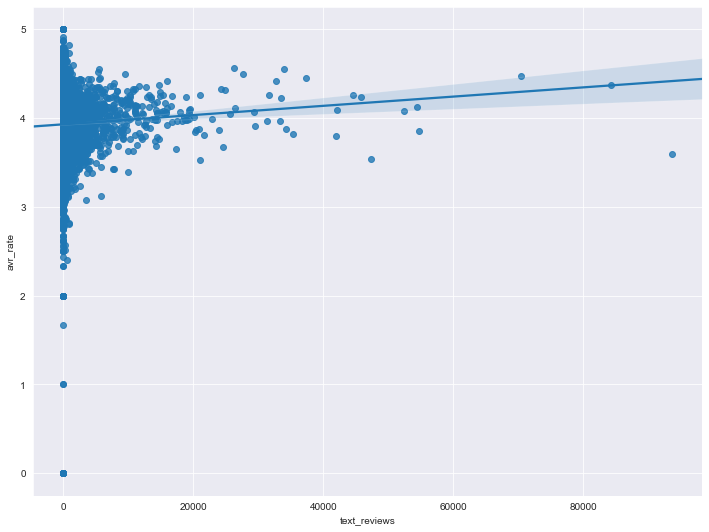

In [95]:
sns.regplot(data_raw.text_reviews, data_raw.avr_rate)

In [106]:
formula = 'avr_rate ~ text_reviews'
model = smf.ols(formula, data = data_raw)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     18.53
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           1.68e-05
Time:                        12:17:32   Log-Likelihood:                -5359.0
No. Observations:               13718   AIC:                         1.072e+04
Df Residuals:                   13716   BIC:                         1.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9278      0.003   1258.583      0.000       3.922       3.934
text_reviews  5.199e-06   1.21e-06      4.305      0.000    2.83e-06    7.57e-06
==============================================================================
Omnibus:                    11587.874   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           787509.920
Skew:                          -3.664   Prob(JB):                         0.00
Kurtosis:                      39.388   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
formula = 'avr_rate ~ ratings'
model = smf.ols(formula, data = data_raw)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02473
Date:                Fri, 15 Nov 2019   Prob (F-statistic):              0.875
Time:                        12:17:27   Log-Likelihood:            -2.3622e+05
No. Observations:               13719   AIC:                         4.724e+05
Df Residuals:                   13717   BIC:                         4.725e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.362e+04   6.29e+04      1.012      0.311   -5.96e+04    1.87e+05
ratings       -0.0864      0.550     -0.157      0.875      -1.164       0.991
==============================================================================
Omnibus:                    57308.399   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     107538270888.096
Skew:                         117.115   Prob(JB):                         0.00
Kurtosis:                   13716.951   Cond. No.                     1.16e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
formula = 'avr_rate ~ num_pages'
model = smf.ols(formula, data = data_raw)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.837
Date:                Fri, 15 Nov 2019   Prob (F-statistic):              0.175
Time:                        12:17:18   Log-Likelihood:            -2.3622e+05
No. Observations:               13719   AIC:                         4.724e+05
Df Residuals:                   13717   BIC:                         4.725e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.761e+05   1.05e+05      1.684      0.092   -2.88e+04    3.81e+05
num_pages   -333.1003    245.762     -1.355      0.175    -814.828     148.627
==============================================================================
Omnibus:                    57304.901   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     107481448679.049
Skew:                         117.092   Prob(JB):                         0.00
Kurtosis:                   13713.327   Cond. No.                         717.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can extract the parameters

inter = results.params['Intercept']
slope = results.params['text_reviews']
inter, slope

In [61]:
inter = results.params['Intercept']
slope = results.params['ratings']
inter, slope1

(3.9282290857229474, 1.3074124858963043e-07)

And the p-value of the slope estimate

slope_pvalue = results.pvalues['text_reviews']
slope_pvalue

In [62]:
slope_pvalue = results.pvalues['ratings']
slope_pvalue

1.3368243497115117e-06

And the coefficient of determination

In [46]:
#for ratings
results.rsquared

0.001702423329278946

The difference in rates

In [63]:
req = data.groupby(pd.cut(data['avr_rate'], [0,1,2,3,4,5]))
req = req[['text_reviews']]
req.sum().reset_index()

,avr_rate,text_reviews
0,"(0, 1]",0.0
1,"(1, 2]",584.0
2,"(2, 3]",194661.0
3,"(3, 4]",7033343.0
4,"(4, 5]",89673.0


In [64]:
for i in range(6):
    print('Mean value of text reviews with average rating ', i, ' is ', data[data['avr_rate'] == i]['text_reviews'].mean())

Mean value of text reviews with average rating  0  is  0.029411764705882353
Mean value of text reviews with average rating  1  is  0.0
Mean value of text reviews with average rating  2  is  29.2
Mean value of text reviews with average rating  3  is  223.23509174311926
Mean value of text reviews with average rating  4  is  560.5597353949152
Mean value of text reviews with average rating  5  is  369.0246913580247


In [65]:
data['avr_rate'] = data['avr_rate'].apply(lambda x: round(x,0))

In [66]:
groupby_avr = data.groupby('avr_rate')

In [67]:
groupby_avr['ratings'].mean()

avr_rate
0.0        0.000000
1.0        1.500000
2.0      270.000000
3.0     4398.354358
4.0    18661.636327
5.0    23245.489712
Name: ratings, dtype: float64

In [68]:
for rate, value in groupby_avr['text_reviews']:
    print(rate,'-----', value.mean())

0.0 ----- 0.029411764705882353
1.0 ----- 0.0
2.0 ----- 29.2
3.0 ----- 223.23509174311926
4.0 ----- 560.5597353949152
5.0 ----- 369.0246913580247


In [69]:
zero_rate = data[data['avr_rate'] == 0]['text_reviews']
one_rate = data[data['avr_rate'] == 1]['text_reviews']
two_rate = data[data['avr_rate'] == 2]['text_reviews']
three_rate = data[data['avr_rate'] == 3]['text_reviews']
four_rate = data[data['avr_rate'] == 4]['text_reviews']
five_rate = data[data['avr_rate'] == 5]['text_reviews']

In [70]:
mean_zero_rate = data[data['avr_rate'] == 0]['text_reviews'].mean()
mean_one_rate = data[data['avr_rate'] == 1]['text_reviews'].mean()
mean_two_rate = data[data['avr_rate'] == 2]['text_reviews'].mean()
mean_three_rate = data[data['avr_rate'] == 3]['text_reviews'].mean()
mean_four_rate = data[data['avr_rate'] == 4]['text_reviews'].mean()
mean_five_rate = data[data['avr_rate'] == 5]['text_reviews'].mean()

In [71]:
mean_zero_rew = data[data['avr_rate'] == 0]['ratings'].mean()
mean_one_rew = data[data['avr_rate'] == 1]['ratings'].mean()
mean_two_rew = data[data['avr_rate'] == 2]['ratings'].mean()
mean_three_rew = data[data['avr_rate'] == 3]['ratings'].mean()
mean_four_rew = data[data['avr_rate'] == 4]['ratings'].mean()
mean_five_rew = data[data['avr_rate'] == 5]['ratings'].mean()

In [72]:
diff_rate = mean_zero_rate - mean_one_rate - mean_two_rate - mean_three_rate - mean_four_rate - mean_five_rate
diff_rate

-1181.990106731353

In [73]:
diff_rew = mean_zero_rew - mean_one_rew - mean_two_rew - mean_three_rew - mean_four_rew - mean_five_rew
diff_rew

-46576.98039714126

In [74]:
slope * diff_rate

-0.00015453486237464764

In [103]:
formula = 'avr_rate ~ text_reviews + ratings'
results = smf.ols(formula, data = data_raw).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.73
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           8.15e-06
Time:                        12:17:08   Log-Likelihood:                -5356.5
No. Observations:               13718   AIC:                         1.072e+04
Df Residuals:                   13715   BIC:                         1.074e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9281      0.003   1257.402      0.000       3.922       3.934
text_reviews  6.145e-07   2.39e-06      0.257      0.797   -4.08e-06    5.31e-06
ratings       1.189e-07   5.36e-08      2.218      0.027    1.38e-08    2.24e-07
==============================================================================
Omnibus:                    11596.160   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           789248.967
Skew:                          -3.668   Prob(JB):                         0.00
Kurtosis:                      39.428   Cond. No.                     1.17e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
formula = 'avr_rate ~ text_reviews + num_pages'
results = smf.ols(formula, data = data_raw).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     204.7
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           2.58e-88
Time:                        12:16:01   Log-Likelihood:                -5166.5
No. Observations:               13718   AIC:                         1.034e+04
Df Residuals:                   13715   BIC:                         1.036e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8475      0.005    754.969      0.000       3.838       3.858
text_reviews  4.394e-06   1.19e-06      3.688      0.000    2.06e-06    6.73e-06
num_pages        0.0002   1.19e-05     19.756      0.000       0.000       0.000
==============================================================================
Omnibus:                    11683.107   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           823866.795
Skew:                          -3.701   Prob(JB):                         0.00
Kurtosis:                      40.237   Cond. No.                     4.38e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

formula = 'avr_rate ~ ratings + num_pages'
results = smf.ols(formula, data = data_raw).fit()
results.summary()

In [110]:
data_raw['num_pages2'] = data_raw.num_pages**2

In [111]:
formula = 'avr_rate ~ text_reviews + num_pages + num_pages2'
results = smf.ols(formula, data = data_raw).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     137.9
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           5.16e-88
Time:                        12:19:03   Log-Likelihood:                -5164.4
No. Observations:               13718   AIC:                         1.034e+04
Df Residuals:                   13714   BIC:                         1.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.8409      0.006    635.068      0.000       3.829       3.853
text_reviews  4.317e-06   1.19e-06      3.621      0.000    1.98e-06    6.65e-06
num_pages        0.0003   1.81e-05     14.563      0.000       0.000       0.000
num_pages2   -1.562e-08   7.63e-09     -2.048      0.041   -3.06e-08   -6.68e-10
==============================================================================
Omnibus:                    11666.446   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           821317.325
Skew:                          -3.693   Prob(JB):                         0.00
Kurtosis:                      40.180   Cond. No.                     1.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
data_raw['text_reviews2'] = data_raw.text_reviews**2

In [115]:
formula = 'avr_rate ~ num_pages + text_reviews + text_reviews2'
results = smf.ols(formula, data = data_raw).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avr_rate   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     138.0
Date:                Fri, 15 Nov 2019   Prob (F-statistic):           4.07e-88
Time:                        12:20:50   Log-Likelihood:                -5164.2
No. Observations:               13718   AIC:                         1.034e+04
Df Residuals:                   13714   BIC:                         1.037e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.8464      0.005    751.029      0.000       3.836       3.856
num_pages         0.0002   1.19e-05     19.699      0.000       0.000       0.000
text_reviews   7.998e-06   2.05e-06      3.903      0.000    3.98e-06     1.2e-05
text_reviews2 -8.866e-11    4.1e-11     -2.161      0.031   -1.69e-10   -8.25e-12
==============================================================================
Omnibus:                    11673.621   Durbin-Watson:                   1.610
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           822723.284
Skew:                          -3.696   Prob(JB):                         0.00
Kurtosis:                      40.212   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sometimes I'm completely confused about what I'm doing and lose the logic thread